In [65]:
# Here the target (dependent) variable is discrete, most likely the logistic regression technique is applicable. 
# In other words, this technique is used to compute the probability of mutually exclusive occurrences such as true/false, 0/1, and in our case yes/no.
# However, we will use different regression techniques to see the efficiency of other regressiob models to predict

## Data Preparation

In [66]:
# First import libraries to work with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Read the csv file and make pandas dataframe
df = pd.read_csv("bank-full.csv",sep=";")

In [68]:
# Let's check first few records
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [69]:
# Let's check if there is null values in any of the columns
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [70]:
# Luckily there are no missing records, that means we do not need to work on missing data

In [71]:
# Name of the columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [72]:
## We need to find unique values in caregorical columns, so we can convert them to numeric values.
df_ = df.select_dtypes(exclude=['int', 'float']) # this will remove all numetical columns type
for col in df_.columns:
    print(df_[col].value_counts()) # to print count of every category
    print(df_[col].unique()) # to print categories name only
    

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
['married' 'single' 'divorced']
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
['tertiary' 'secondary' 'unknown' 'primary']
no     44396
yes      815
Name: default, dtype: int64
['no' 'yes']
yes    25130
no     20081
Name: housing, dtype: int64
['yes' 'no']
no     37967
yes     7244
Name: loan, dtype: int64
['no' 'yes']
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
['unknown' 'ce

In [73]:
# Apply map function to convert yes/no categorical values to numerical. First let's do it for boolean values columns
# Name: default, dtype: int64  --> ['no' 'yes']
# Name: housing, dtype: int64 --> ['yes' 'no']
# Name: loan, dtype: int64 --> ['no' 'yes']
# Name: y, dtype: int64 --> ['no' 'yes']
df['default'] = df['default'].map({'yes':1, 'no':0})
df['housing'] = df['housing'].map({'yes':1, 'no':0})
df['loan'] = df['loan'].map({'yes':1, 'no':0})
df['y'] = df['y'].map({'yes':1, 'no':0})

In [74]:
# check how dataframe look now
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [102]:
# We can convert Month also into numerical feature
df['month'] = df['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})

In [104]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,5,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,5,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,5,380,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,5,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,5,55,1,-1,0,unknown,0


## Data Exploration

In [103]:
# describe the dataframe
df.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [105]:
# Balance and pdays have negative values. we need to understand their correlation with dependent feature y. Let's start
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [76]:
# understand the dependent variable 'y'
df['y'].describe()

count    45211.000000
mean         0.116985
std          0.321406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

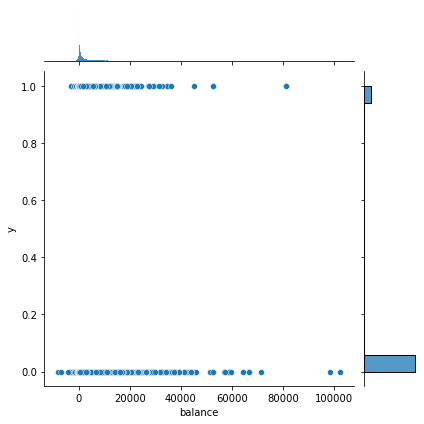

In [106]:
sns.jointplot(x=df['balance'],
              y=df['y'],
              kind='scatter');

In [107]:
df.corr().balance.y

0.05283841028818257

In [108]:
# the correlation is very low. so we can convert -negative values to 0
df.loc[df['balance'] < 0, 'balance'] = 0

In [109]:
df['balance'].describe()

count     45211.000000
mean       1388.734069
std        3029.530442
min           0.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [110]:
# we do the same for pdays where there are negative values
df.corr().pdays.y

0.10362149401628759

In [111]:
# As there is very low value in correlation, we can convert -ve values to 0
df.loc[df['pdays'] < 0, 'pdays'] = 0

In [112]:
df['pdays'].describe()

count    45211.000000
mean        41.015195
std         99.792615
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        871.000000
Name: pdays, dtype: float64

In [113]:
# there is no much insights from the dependent variable
# let's check how the variables are correlated.
# for that we need to remove categorical columns and store the data into new dataframe called df_numeric
df_numeric = df.select_dtypes(exclude=['O'])
df_numeric.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,5,261,1,0,0,0
1,44,0,29,1,0,5,5,151,1,0,0,0
2,33,0,2,1,1,5,5,76,1,0,0,0
3,47,0,1506,1,0,5,5,92,1,0,0,0
4,33,0,1,0,0,5,5,198,1,0,0,0


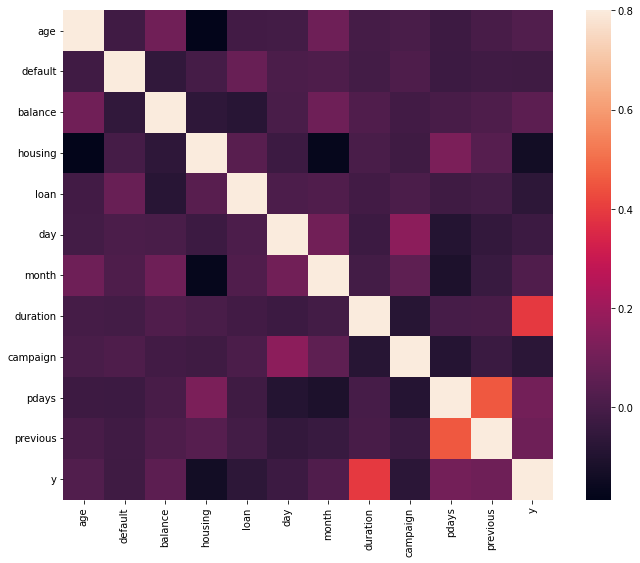

In [114]:
corrmat = df_numeric.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [119]:
# it seems campaign and housing are not related with dependent variable 'y'
df.corr().housing.y

-0.13917270249816852

In [120]:
df.corr().campaign.y

-0.07317200634586739

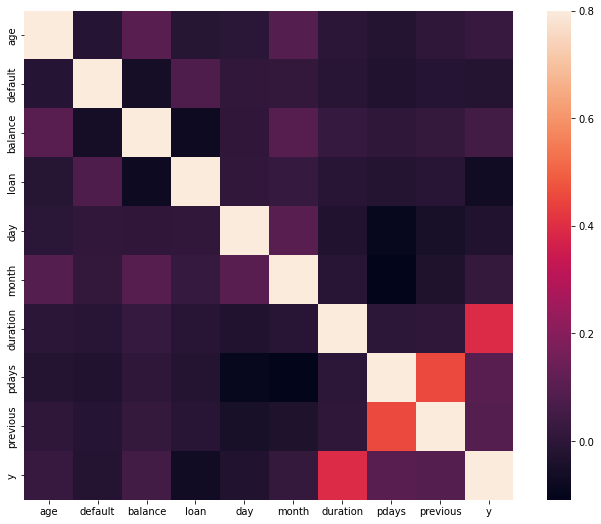

In [121]:
# we can remove these features and check correlation matrix again
df_numeric= df_numeric.drop(columns=['housing', 'campaign'])
corrmat = df_numeric.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [122]:
# now loan column is also seems not well correlated
df.corr().loan.y

-0.06818503472421278

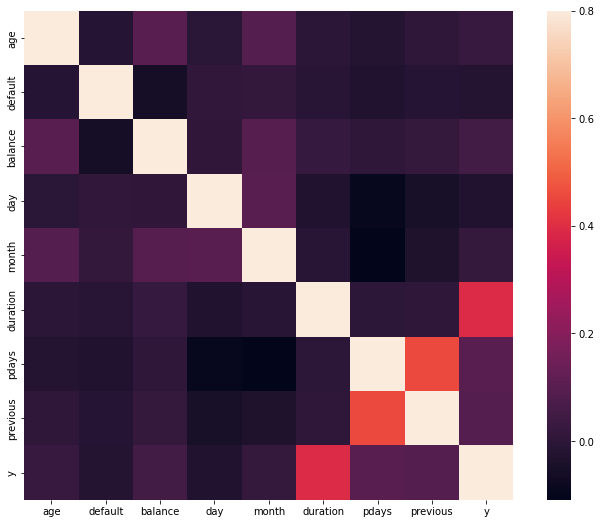

In [123]:
# we can remove these features and check correlation matrix again
df_numeric= df_numeric.drop(columns=['loan'])
corrmat = df_numeric.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Feature Engineering

### Now, let's check all applicable features relation with 'y'
### Numeric Features

In [124]:
#We will plot histogram for all numerical variables


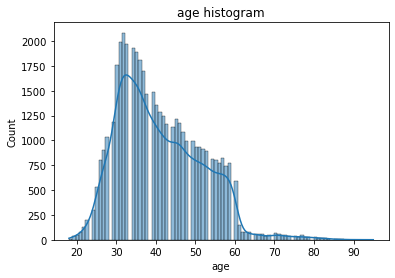

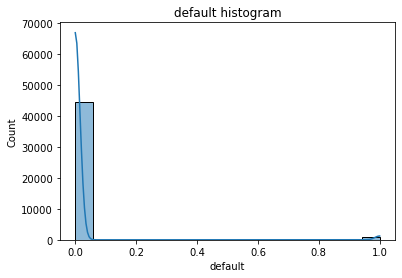

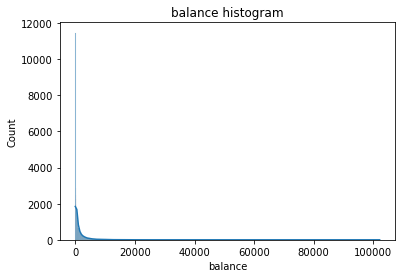

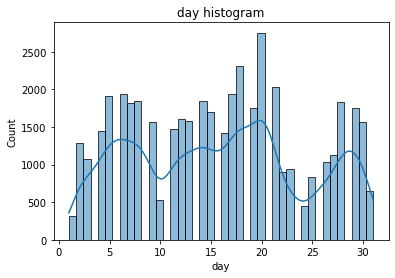

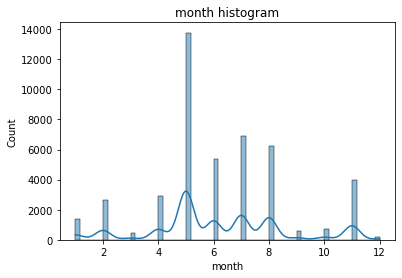

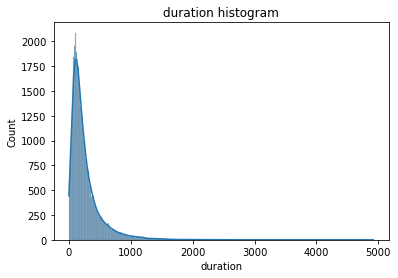

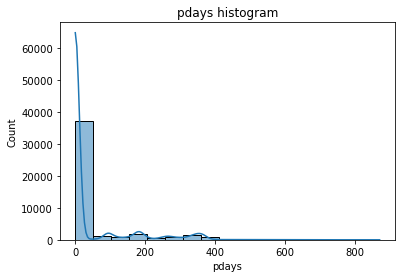

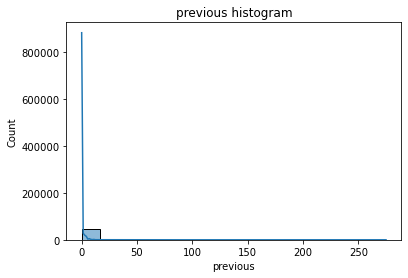

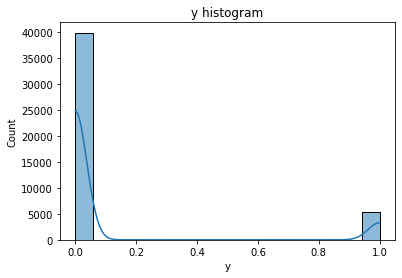

In [125]:
for col in df_numeric[df_numeric['y'] == 1].columns:
  fig, ax = plt.subplots()
  plt.title(f'{col} histogram')
  sns.histplot(data=df_numeric, x=col, ax=ax,kde=True)
  plt.show()

In [126]:
# Age between 30 and 40 are the users who make deposites the most

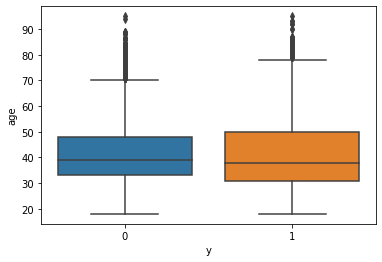

In [127]:
sns.boxplot(x = 'y',
            y = 'age',
            data = df)
plt.show()

In [128]:
#sns.pairplot(df_numeric, 
#             kind = 'scatter',
#             corner = True)
#plt.show()

In [171]:
# Let's see which job holder has higher chances of subscribing to the deposite
#df[['job','y']].groupby(['job']).count().sort_values(by='y',ascending=False)

# First find out all occurance of jobs
df_tmp1 = df[['job','y']].groupby(['job']).count().sort_values(by='y',ascending=False)
df_tmp1 = df_tmp1.rename(columns={'y': 'Total'},errors="raise")

# Now let's find jobs where y=1
df_tmp2=df[df['y'] == 1][['job','y']].groupby(['job']).count().sort_values(by='y',ascending=False)


# Now we merge them to get a common dataframe and add % columns
df_final = pd.merge(df_tmp2, df_tmp1, on='job')

# Let's add Percentage column (out of how many people in the same job have made deposite (y==1))
df_final['Percentage'] = 100 * df_final['y'] / df_final['Total']

# Now let's sort the dataframe by percentage in descending order
df_final.round(2).sort_values(by='Percentage',ascending=False)

,y,Total,Percentage
job,,,
student,269,938,28.68
retired,516,2264,22.79
unemployed,202,1303,15.50
management,1301,9458,13.76
admin.,631,5171,12.20
self-employed,187,1579,11.84
unknown,34,288,11.81
technician,840,7597,11.06
services,369,4154,8.88


In [ ]:
# This gives an idea that students, retred and unemployed are top-3 people who can opt for the deposite
# While housemaid, entrepreneur, blue-collar job holder aren't investing much in deposites


In [172]:
# we define a function which can perform the same analysis for other features
def related_feature(feature):
    #This function will take feature as input and evaluate relation with 'y' dependent variable
    
    df_tmp1 = df[[feature,'y']].groupby([feature]).count().sort_values(by='y',ascending=False)
    df_tmp1 = df_tmp1.rename(columns={'y': 'Total'},errors="raise")

    # Now let's find jobs where y=1
    df_tmp2=df[df['y'] == 1][[feature,'y']].groupby([feature]).count().sort_values(by='y',ascending=False)


    # Now we merge them to get a common dataframe and add % columns
    df_final = pd.merge(df_tmp2, df_tmp1, on=feature)

    # Let's add Percentage column (out of how many people in the same job have made deposite (y==1))
    df_final['Percentage'] = 100 * df_final['y'] / df_final['Total']

    # Now let's sort the dataframe by percentage in descending order and return
    return df_final.round(2).sort_values(by='Percentage',ascending=False)
    

In [174]:
# Let's see the number of married, single have dependent variable 'y'
df_ = related_feature('marital')
df_

,y,Total,Percentage
marital,,,
single,1912,12790,14.95
divorced,622,5207,11.95
married,2755,27214,10.12


In [ ]:
# Although the percentage doesn't give significant insight, it seems singles tend to opt for deposite more

In [175]:
# Count by level of education.
df_ = related_feature('education')
df_

,y,Total,Percentage
education,,,
tertiary,1996,13301,15.01
unknown,252,1857,13.57
secondary,2450,23202,10.56
primary,591,6851,8.63


In [176]:
# % of contacts
df_ = related_feature('contact')
df_

,y,Total,Percentage
contact,,,
cellular,4369,29285,14.92
telephone,390,2906,13.42
unknown,530,13020,4.07


In [177]:
# deposites by months
df_ = related_feature('month')
df_

,y,Total,Percentage
month,,,
3,248,477,51.99
12,100,214,46.73
9,269,579,46.46
10,323,738,43.77
4,577,2932,19.68
2,441,2649,16.65
8,688,6247,11.01
6,546,5341,10.22
11,403,3970,10.15


In [46]:
# It seems Mar, Dec, Sep are the months when high chances of deposites are made


In [178]:
df_numeric.shape

(45211, 9)

In [182]:
df_numeric.describe()

,age,default,balance,day,month,duration,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1388.734069,15.806419,6.144655,258.163080,41.015195,0.580323,0.116985
std,10.618762,0.133049,3029.530442,8.322476,2.408034,257.527812,99.792615,2.303441,0.321406
min,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,8.000000,5.000000,103.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,16.000000,6.000000,180.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,21.000000,8.000000,319.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,31.000000,12.000000,4918.000000,871.000000,275.000000,1.000000


In [179]:
#### Considering that we are going to use linear regression, let's start identifying important features
# First, let's divide data into x and y where y is the target variable
y = df_numeric['y']
X = df_numeric[df_numeric.columns.difference(['y'])]

y.shape


(45211,)

In [180]:
X.shape

(45211, 8)

###### --> chi-square test to check features

In [193]:
from sklearn.feature_selection import SelectKBest, chi2

# Load the dataset
# X = ... # features
# y = ... # target

# Use SelectKBest to select the top 10 features
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Print the selected features
print(selector.get_support())
X.columns

[False  True  True False  True False  True  True]


Index(['age', 'balance', 'day', 'default', 'duration', 'month', 'pdays',
       'previous'],
      dtype='object')

In [ ]:
# Age, Day and duration are not very well related. We use this information when we run the model

###### --> Recursive Feature Elemination (RFE) method

In [192]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset - we already have X and y


# Create a logistic regression model
model = LogisticRegression()

# Use RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Print the selected features
print(rfe.support_)
X.head()

C:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ True False  True  True False  True False  True]


,age,balance,day,default,duration,month,pdays,previous
0,58,2143,5,0,261,5,0,0
1,44,29,5,0,151,5,0,0
2,33,2,5,0,76,5,0,0
3,47,1506,5,0,92,5,0,0
4,33,1,5,0,198,5,0,0


In [47]:
# It looks like balance, duration and pdays are the feature we can remove
# We use this information when we run the model

In [ ]:
# So far we have identified following features which are not much related to output variable 'y'
# From correlation matrix --> 'loan', 'housing', 'campaign'
# From Chi-square test --> 'age', 'day', 'duration'
# From Recursive Feature Elemination --> 'balance', 'duration', 'pdays'

# When we build the final model we eliminate some of these columns and see how model efficiency is affected

In [194]:
# Now, let's define function to get dummies that can be added to existing df
def dummies(df, col):
    return pd.get_dummies(df[col], prefix=col, prefix_sep=':')



In [195]:
df_dummies = pd.DataFrame()

# For each categorical columns, find dummies and concatenate them together
for column in df.select_dtypes(include=['O']).columns: # include=['O'] will show only non-numeric columns
    df_dummies = pd.concat([df_dummies, dummies(df,column)], axis=1)
    #print(column)
df_dummies.head(10)

,job:admin.,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,job:self-employed,job:services,job:student,job:technician,...,education:secondary,education:tertiary,education:unknown,contact:cellular,contact:telephone,contact:unknown,poutcome:failure,poutcome:other,poutcome:success,poutcome:unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
6,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [197]:
# Check all categorical columns
df.select_dtypes(include=['O']).columns

Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')

In [198]:
# Drop all non-numerical columns from the main dataframe
df.drop(df.select_dtypes(include=['O']).columns, axis=1, inplace=True)

In [199]:
# Now concatenate dummies columns to the main dataframe
df = pd.concat([df, df_dummies], axis = 1)

In [200]:
df.head(10)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education:secondary,education:tertiary,education:unknown,contact:cellular,contact:telephone,contact:unknown,poutcome:failure,poutcome:other,poutcome:success,poutcome:unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,0,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,1,0,0,1,0,0,0,1
5,35,0,231,1,0,5,5,139,1,0,...,0,1,0,0,0,1,0,0,0,1
6,28,0,447,1,1,5,5,217,1,0,...,0,1,0,0,0,1,0,0,0,1
7,42,1,2,1,0,5,5,380,1,0,...,0,1,0,0,0,1,0,0,0,1
8,58,0,121,1,0,5,5,50,1,0,...,0,0,0,0,0,1,0,0,0,1
9,43,0,593,1,0,5,5,55,1,0,...,1,0,0,0,0,1,0,0,0,1


In [201]:
df.shape

(45211, 38)

In [202]:
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Model Selection and Tuning

In [203]:
# Split data to Train and test. For that ler's import train_test_split from sklearn library
from sklearn.model_selection import train_test_split


In [204]:
y = df.pop('y')
X = df
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education:secondary,education:tertiary,education:unknown,contact:cellular,contact:telephone,contact:unknown,poutcome:failure,poutcome:other,poutcome:success,poutcome:unknown
10747,36,0,0,0,0,17,6,153,4,0,...,0,1,0,0,0,1,0,0,0,1
26054,56,0,196,0,0,19,11,312,3,0,...,1,0,0,1,0,0,0,0,0,1
9125,46,0,0,1,0,5,6,83,2,0,...,1,0,0,0,0,1,0,0,0,1
41659,41,0,3426,0,0,1,10,302,1,119,...,0,1,0,1,0,0,0,0,1,0
4443,38,0,0,1,0,20,5,90,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,0,1059,0,0,18,6,2093,1,0,...,0,0,0,0,0,1,0,0,0,1
44732,23,0,508,0,0,8,9,210,1,92,...,0,1,0,1,0,0,1,0,0,0
38158,34,0,1317,1,0,15,5,239,1,0,...,0,1,0,1,0,0,0,0,0,1
860,33,0,165,0,0,7,5,111,1,0,...,1,0,0,0,0,1,0,0,0,1


In [205]:
X_train

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education:secondary,education:tertiary,education:unknown,contact:cellular,contact:telephone,contact:unknown,poutcome:failure,poutcome:other,poutcome:success,poutcome:unknown
10747,36,0,0,0,0,17,6,153,4,0,...,0,1,0,0,0,1,0,0,0,1
26054,56,0,196,0,0,19,11,312,3,0,...,1,0,0,1,0,0,0,0,0,1
9125,46,0,0,1,0,5,6,83,2,0,...,1,0,0,0,0,1,0,0,0,1
41659,41,0,3426,0,0,1,10,302,1,119,...,0,1,0,1,0,0,0,0,1,0
4443,38,0,0,1,0,20,5,90,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,0,1059,0,0,18,6,2093,1,0,...,0,0,0,0,0,1,0,0,0,1
44732,23,0,508,0,0,8,9,210,1,92,...,0,1,0,1,0,0,1,0,0,0
38158,34,0,1317,1,0,15,5,239,1,0,...,0,1,0,1,0,0,0,0,0,1
860,33,0,165,0,0,7,5,111,1,0,...,1,0,0,0,0,1,0,0,0,1


In [206]:
X_test

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education:secondary,education:tertiary,education:unknown,contact:cellular,contact:telephone,contact:unknown,poutcome:failure,poutcome:other,poutcome:success,poutcome:unknown
3776,40,0,580,1,0,16,5,192,1,0,...,1,0,0,0,0,1,0,0,0,1
9928,47,0,3644,0,0,9,6,83,2,0,...,1,0,0,0,0,1,0,0,0,1
33409,25,0,538,1,0,20,4,226,1,0,...,0,1,0,1,0,0,0,0,0,1
31885,42,0,1773,0,0,9,4,311,1,336,...,0,1,0,1,0,0,1,0,0,0
15738,56,0,217,0,1,21,7,121,2,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,46,0,2800,0,0,5,6,47,1,0,...,0,1,0,0,0,1,0,0,0,1
380,38,0,757,1,0,6,5,133,1,0,...,1,0,0,0,0,1,0,0,0,1
7713,41,0,4539,0,0,30,5,298,3,0,...,1,0,0,0,0,1,0,0,0,1
12188,41,0,1309,0,0,20,6,28,4,0,...,1,0,0,0,0,1,0,0,0,1


In [207]:
# apply regression model
# First we will apply linear regression (although it's not relevant here) and measure efficiency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [208]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [209]:
# let's see how it performs
r2_score(y_test, y_pred)

0.2747618879011712

In [210]:
# It can only provide 27% efficient prediction!!
# now we will focus on logistic regression


### Now, let's apply Logistics regression and work with different features that we identified


#### Run-1

In [216]:
#### Applying logistics regression with all features
log_regr = LogisticRegression(penalty='l2',solver='liblinear',random_state=33, max_iter=1000)
log_regr.fit(X_train, y_train)


y_pred = log_regr.predict(X_test)

# Let's see the score
log_regr.score(X_test,y_test)

0.8994396933058095

In [ ]:
# Now, let's see with different solver

#### Run-2

In [217]:
#### Applying logistics regression with all features
log_regr = LogisticRegression(penalty='l2',solver='sag',random_state=33, max_iter=1000)
log_regr.fit(X_train, y_train)


y_pred = log_regr.predict(X_test)

# Let's see the score
log_regr.score(X_test,y_test)

C:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8863904452963728

#### Run-3

In [219]:
log_regr = LogisticRegression(penalty='l2',solver='saga',random_state=33, max_iter=1000)
log_regr.fit(X_train, y_train)


y_pred = log_regr.predict(X_test)

# Let's see the score
log_regr.score(X_test,y_test)

C:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8836626363904453

In [220]:
# Now, we will remove the columns which are not correlated with output variable 'y'
# So far we have identified following features which are not much related to output variable 'y'
# From correlation matrix --> 'loan', 'housing', 'campaign'
# From Chi-square test --> 'age', 'day', 'duration'
# From Recursive Feature Elemination --> 'balance', 'duration', 'pdays'
# First, we remove 'loan', 'housing' and 'campaign'

X_train = X_train.drop(columns=['loan','housing', 'campaign'])
X_test = X_test.drop(columns=['loan','housing', 'campaign'])

#### Run-4

In [221]:
log_regr = LogisticRegression(penalty='l2',solver='liblinear',random_state=33, max_iter=1000)
log_regr.fit(X_train, y_train)


y_pred = log_regr.predict(X_test)

# Let's see the score
log_regr.score(X_test,y_test)

0.8995871424358596

In [222]:
# Now, we remove 'balance', 'duration', 'pdays' (from RFE method)

X_train = X_train.drop(columns=['balance','duration', 'pdays'])
X_test = X_test.drop(columns=['balance','duration', 'pdays'])

### Run-5

In [223]:
log_regr = LogisticRegression(penalty='l2',solver='liblinear',random_state=33, max_iter=1000)
log_regr.fit(X_train, y_train)


y_pred = log_regr.predict(X_test)

# Let's see the score
log_regr.score(X_test,y_test)

0.8923621350634031

In [224]:
# Now, we remove 'day' (from chi-square method)
# We keep age column, as we have certain age-range which is highly likely go for deposite
# 'duration' we already removed

X_train = X_train.drop(columns=['day'])
X_test = X_test.drop(columns=['day'])

#### Run-6

In [229]:
log_regr = LogisticRegression(penalty='l2',solver='liblinear',random_state=33, max_iter=1000)
log_regr.fit(X_train, y_train)


y_pred = log_regr.predict(X_test)

# Let's see the score
log_regr.score(X_test,y_test)

0.8924358596284282

#### Run-7

In [230]:
# Trying this run is 'sag' solver
log_regr = LogisticRegression(penalty='l2',solver='sag',random_state=33, max_iter=1000)
log_regr.fit(X_train, y_train)


y_pred = log_regr.predict(X_test)

# Let's see the score
log_regr.score(X_test,y_test)

0.8924358596284282

In [ ]:
# Run-4 is the most efficient model. We will only remove 'loan','housing' and 'campaign' columns and keep other columns for predictions
